### Importing packages 

In [1]:
import eikon as ek # pip install eikon
import pandas as pd
import numpy as np
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sqlite3

### Getting data using API 

In [2]:
ek.set_app_key('ff90d313105c44d7b1d0b20a5a9c0cb0806a21d1')

In [3]:
df1 = ek.get_timeseries([".spx", '.ndx','.nya', '.oex', '.xax'],fields = 'open', start_date="2010-01-01",  end_date="2020-01-01",interval='monthly')
df1

OPEN,.SPX,.NDX,.NYA,.OEX,.XAX
Date,,,,,
2010-01-31,1116.56,1882.690,7184.98,514.74,1824.95
2010-02-28,1073.89,1745.910,6883.79,495.09,1796.33
2010-03-31,1105.36,1826.620,7035.05,506.47,1845.71
2010-04-30,1171.23,1968.440,7447.94,535.61,1906.98
2010-05-31,1188.58,2010.940,7474.43,541.15,1927.65
...,...,...,...,...,...
2019-08-31,2980.32,7866.600,13066.60,1318.19,2521.59
2019-09-30,2909.01,7634.031,12720.19,1284.69,2408.98
2019-10-31,2983.69,7782.818,13002.33,1318.40,2488.16


In [4]:
df2 = ek.get_timeseries(["USCPI=ECI", 'USUNR=ECI', 'USEXP=ECI', 'USIMP=ECI', 'USTBAL=ECI', 'USGPCS=ECI',' USDGND=ECI', 'USGDEF=ECI', 'aUSXGBETSA', 'aUSLIDXIR10'], start_date="2010-01-01",  end_date="2020-01-01",interval='monthly')
df2

VALUE,USCPI=ECI,USUNR=ECI,USEXP=ECI,USIMP=ECI,USTBAL=ECI,USGPCS=ECI,USDGND=ECI,USGDEF=ECI,aUSXGBETSA,aUSLIDXIR10
Date,,,,,,,,,,
2010-01-31,0.1,9.8,0.8,1.2,-3.774000e+10,0.0,3.0,-4.300000e+10,11789000000,3.62
2010-02-28,-0.1,9.8,-0.3,-0.1,-4.150000e+10,0.3,1.7,-2.210000e+11,15620000000,3.56
2010-03-31,0.0,9.9,0.7,0.4,-4.027000e+10,0.6,-0.6,-6.500000e+10,12383000000,3.57
2010-04-30,0.0,9.9,1.1,1.1,-4.150000e+10,0.2,10.6,-8.300000e+10,10928000000,3.65
2010-05-31,-0.1,9.6,0.5,-0.8,-4.209000e+10,0.2,-0.8,-1.360000e+11,10738000000,3.22
...,...,...,...,...,...,...,...,...,...,...
2019-08-31,0.1,3.7,-0.6,-0.6,-5.078000e+10,0.3,-0.6,-2.000000e+11,9058000000,-0.50
2019-09-30,0.2,3.5,-0.3,0.1,-4.784000e+10,0.2,-1.2,8.300000e+10,8442000000,-0.34
2019-10-31,0.3,3.6,0.0,-0.4,-4.303000e+10,0.4,0.1,-1.340000e+11,11052000000,-0.12


In [5]:
df = df2.merge(df1, how='left', left_on='Date', right_on='Date')
df

,USCPI=ECI,USUNR=ECI,USEXP=ECI,USIMP=ECI,USTBAL=ECI,USGPCS=ECI,USDGND=ECI,USGDEF=ECI,aUSXGBETSA,aUSLIDXIR10,.SPX,.NDX,.NYA,.OEX,.XAX
Date,,,,,,,,,,,,,,,
2010-01-31,0.1,9.8,0.8,1.2,-3.774000e+10,0.0,3.0,-4.300000e+10,11789000000,3.62,1116.56,1882.690,7184.98,514.74,1824.95
2010-02-28,-0.1,9.8,-0.3,-0.1,-4.150000e+10,0.3,1.7,-2.210000e+11,15620000000,3.56,1073.89,1745.910,6883.79,495.09,1796.33
2010-03-31,0.0,9.9,0.7,0.4,-4.027000e+10,0.6,-0.6,-6.500000e+10,12383000000,3.57,1105.36,1826.620,7035.05,506.47,1845.71
2010-04-30,0.0,9.9,1.1,1.1,-4.150000e+10,0.2,10.6,-8.300000e+10,10928000000,3.65,1171.23,1968.440,7447.94,535.61,1906.98
2010-05-31,-0.1,9.6,0.5,-0.8,-4.209000e+10,0.2,-0.8,-1.360000e+11,10738000000,3.22,1188.58,2010.940,7474.43,541.15,1927.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,0.1,3.7,-0.6,-0.6,-5.078000e+10,0.3,-0.6,-2.000000e+11,9058000000,-0.50,2980.32,7866.600,13066.60,1318.19,2521.59
2019-09-30,0.2,3.5,-0.3,0.1,-4.784000e+10,0.2,-1.2,8.300000e+10,8442000000,-0.34,2909.01,7634.031,12720.19,1284.69,2408.98
2019-10-31,0.3,3.6,0.0,-0.4,-4.303000e+10,0.4,0.1,-1.340000e+11,11052000000,-0.12,2983.69,7782.818,13002.33,1318.40,2488.16


### Creating Database 

In [6]:
from sqlalchemy import create_engine
engine=create_engine('sqlite://', echo=False)

In [7]:
df.to_sql('data_api', con=engine)

In [8]:
engine.execute("SELECT * FROM data_api").fetchall()

[('2010-01-31 00:00:00.000000', 0.1, 9.8, 0.8, 1.2, -37740000000.0, 0.0, 3.0, -42999999999.99999, 11789000000, 3.62, 1116.56, 1882.69, 7184.98, 514.74, 1824.95),
 ('2010-02-28 00:00:00.000000', -0.1, 9.8, -0.3, -0.1, -41499999999.99999, 0.3, 1.7, -220999999999.99997, 15620000000, 3.56, 1073.89, 1745.91, 6883.79, 495.09, 1796.33),
 ('2010-03-31 00:00:00.000000', 0.0, 9.9, 0.7, 0.4, -40270000000.0, 0.6, -0.6, -64999999999.99999, 12383000000, 3.57, 1105.36, 1826.62, 7035.05, 506.47, 1845.71),
 ('2010-04-30 00:00:00.000000', 0.0, 9.9, 1.1, 1.1, -41499999999.99999, 0.2, 10.6, -82999999999.99998, 10928000000, 3.65, 1171.23, 1968.44, 7447.94, 535.61, 1906.98),
 ('2010-05-31 00:00:00.000000', -0.1, 9.6, 0.5, -0.8, -42090000000.0, 0.2, -0.8, -135999999999.99998, 10738000000, 3.22, 1188.58, 2010.94, 7474.43, 541.15, 1927.65),
 ('2010-06-30 00:00:00.000000', 0.0, 9.4, -0.7, -1.2, -47319999999.99999, 0.2, -0.4, -67999999999.99999, 11244000000, 3.02, 1087.3, 1846.6, 6791.44, 492.24, 1780.21),
 ('20

In [9]:
df.columns

Index(['USCPI=ECI', 'USUNR=ECI', 'USEXP=ECI', 'USIMP=ECI', 'USTBAL=ECI',
       'USGPCS=ECI', 'USDGND=ECI', 'USGDEF=ECI', 'aUSXGBETSA', 'aUSLIDXIR10',
       '.SPX', '.NDX', '.NYA', '.OEX', '.XAX'],
      dtype='object')

In [10]:
import sqlite3
conn = sqlite3.connect('data.db')
c = conn.cursor()
c.execute('''CREATE TABLE data
            (DATE,
            'USCPI=ECI', 
            'USUNR=ECI', 
            'USEXP=ECI', 
            'USIMP=ECI', 
            'USTBAL=ECI',
            'USGPCS=ECI', 
            'USDGND=ECI', 
            'USGDEF=ECI', 
            'aUSXGBETSA', 
            'aUSLIDXIR10',
            '.SPX', 
            '.NDX', 
            '.NYA', 
            '.OEX', 
            '.XAX')''')

print('Table created successfully')

Table created successfully


In [11]:
c = conn.cursor()
c.executemany("INSERT INTO data VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)", engine.execute("SELECT * FROM data_api").fetchall())
conn.commit()

### Reading data from the database 

In [12]:
import sqlite3
conn = sqlite3.connect('data.db')
c = conn.cursor()
c.execute("SELECT * FROM data")
new_data = c.fetchall()
new_data

[('2010-01-31 00:00:00.000000',
  0.1,
  9.8,
  0.8,
  1.2,
  -37740000000.0,
  0.0,
  3.0,
  -42999999999.99999,
  11789000000,
  3.62,
  1116.56,
  1882.69,
  7184.98,
  514.74,
  1824.95),
 ('2010-02-28 00:00:00.000000',
  -0.1,
  9.8,
  -0.3,
  -0.1,
  -41499999999.99999,
  0.3,
  1.7,
  -220999999999.99997,
  15620000000,
  3.56,
  1073.89,
  1745.91,
  6883.79,
  495.09,
  1796.33),
 ('2010-03-31 00:00:00.000000',
  0.0,
  9.9,
  0.7,
  0.4,
  -40270000000.0,
  0.6,
  -0.6,
  -64999999999.99999,
  12383000000,
  3.57,
  1105.36,
  1826.62,
  7035.05,
  506.47,
  1845.71),
 ('2010-04-30 00:00:00.000000',
  0.0,
  9.9,
  1.1,
  1.1,
  -41499999999.99999,
  0.2,
  10.6,
  -82999999999.99998,
  10928000000,
  3.65,
  1171.23,
  1968.44,
  7447.94,
  535.61,
  1906.98),
 ('2010-05-31 00:00:00.000000',
  -0.1,
  9.6,
  0.5,
  -0.8,
  -42090000000.0,
  0.2,
  -0.8,
  -135999999999.99998,
  10738000000,
  3.22,
  1188.58,
  2010.94,
  7474.43,
  541.15,
  1927.65),
 ('2010-06-30 00:00:00

In [13]:
df = pd.DataFrame(new_data,columns=['Date', 'USCPI=ECI', 'USUNR=ECI', 'USEXP=ECI', 'USIMP=ECI', 'USTBAL=ECI', 
                                    'USGPCS=ECI', 'USDGND=ECI', 'USGDEF=ECI', 'aUSXGBETSA', 'aUSLIDXIR10', 
                                    '.SPX', '.NDX', '.NYA', '.OEX', '.XAX'])
df.head()

,Date,USCPI=ECI,USUNR=ECI,USEXP=ECI,USIMP=ECI,USTBAL=ECI,USGPCS=ECI,USDGND=ECI,USGDEF=ECI,aUSXGBETSA,aUSLIDXIR10,.SPX,.NDX,.NYA,.OEX,.XAX
0,2010-01-31 00:00:00.000000,0.1,9.8,0.8,1.2,-3.774000e+10,0.0,3.0,-4.300000e+10,11789000000,3.62,1116.56,1882.69,7184.98,514.74,1824.95
1,2010-02-28 00:00:00.000000,-0.1,9.8,-0.3,-0.1,-4.150000e+10,0.3,1.7,-2.210000e+11,15620000000,3.56,1073.89,1745.91,6883.79,495.09,1796.33
2,2010-03-31 00:00:00.000000,0.0,9.9,0.7,0.4,-4.027000e+10,0.6,-0.6,-6.500000e+10,12383000000,3.57,1105.36,1826.62,7035.05,506.47,1845.71
3,2010-04-30 00:00:00.000000,0.0,9.9,1.1,1.1,-4.150000e+10,0.2,10.6,-8.300000e+10,10928000000,3.65,1171.23,1968.44,7447.94,535.61,1906.98
4,2010-05-31 00:00:00.000000,-0.1,9.6,0.5,-0.8,-4.209000e+10,0.2,-0.8,-1.360000e+11,10738000000,3.22,1188.58,2010.94,7474.43,541.15,1927.65


### Preprocessing 

In [14]:
df.iloc[:, 11:16] = minmax_scale(df.iloc[:, 11:16])

In [15]:
df['intercept'] = 1

### Splitting data 

In [16]:
train, test = train_test_split(df, shuffle=False)

In [17]:
train

,Date,USCPI=ECI,USUNR=ECI,USEXP=ECI,USIMP=ECI,USTBAL=ECI,USGPCS=ECI,USDGND=ECI,USGDEF=ECI,aUSXGBETSA,aUSLIDXIR10,.SPX,.NDX,.NYA,.OEX,.XAX,intercept
0,2010-01-31 00:00:00.000000,0.1,9.8,0.8,1.2,-3.774000e+10,0.0,3.0,-4.300000e+10,11789000000,3.62,0.040450,0.021110,0.100969,0.050159,0.044792,1
1,2010-02-28 00:00:00.000000,-0.1,9.8,-0.3,-0.1,-4.150000e+10,0.3,1.7,-2.210000e+11,15620000000,3.56,0.020253,0.000597,0.058456,0.029081,0.016139,1
2,2010-03-31 00:00:00.000000,0.0,9.9,0.7,0.4,-4.027000e+10,0.6,-0.6,-6.500000e+10,12383000000,3.57,0.035149,0.012701,0.079806,0.041288,0.065575,1
3,2010-04-30 00:00:00.000000,0.0,9.9,1.1,1.1,-4.150000e+10,0.2,10.6,-8.300000e+10,10928000000,3.65,0.066326,0.033970,0.138086,0.072546,0.126916,1
4,2010-05-31 00:00:00.000000,-0.1,9.6,0.5,-0.8,-4.209000e+10,0.2,-0.8,-1.360000e+11,10738000000,3.22,0.074538,0.040344,0.141825,0.078489,0.147610,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2017-02-28 00:00:00.000000,0.1,4.6,0.3,0.3,-3.952000e+10,0.1,2.1,-1.920000e+11,11642000000,1.76,0.593771,0.512288,0.674017,0.580039,0.658788,1
86,2017-03-31 00:00:00.000000,0.0,4.4,0.1,-0.2,-4.089000e+10,0.4,0.1,-1.760000e+11,10573000000,1.69,0.638519,0.543904,0.723193,0.628632,0.690274,1
87,2017-04-30 00:00:00.000000,0.2,4.5,0.2,0.2,-4.381000e+10,0.2,-0.8,1.820000e+11,7356000000,1.40,0.630098,0.554635,0.709377,0.620287,0.731501,1
88,2017-05-31 00:00:00.000000,-0.1,4.4,-0.6,-0.1,-4.359000e+10,0.0,-0.6,-8.800000e+10,7226000000,1.39,0.642480,0.578966,0.717151,0.631625,0.750193,1


### Running models 

In [18]:
out_of_sample_performance = []
best_performance = 1
best_index = ''
best_variables = ''

for idx in df.columns[11:16]:
    for col in range(6, 11):
        print('Dependent Variable: {}'.format(idx))
        features = list(train.columns[1:col]) + ['intercept']
        print('Independent Variable = {}'.format(features))
        ols = sm.OLS(train[idx], train.loc[:, features])
        result = ols.fit()
        print('Mean Absolute Error: {}'.format(mean_absolute_error(result.predict(test.loc[:, features]), test[idx])))
        out_of_sample_performance.append(mean_absolute_error(result.predict(test.loc[:, features]), test[idx]))
        
        if out_of_sample_performance[-1] < best_performance:
            best_performance = out_of_sample_performance[-1]
            best_index = idx
            best_variables = features
        
        print()
        print()
print('Best Performance: \nIndex: {0}   \nVariables:  {1}   \nMean Absolute Error  {2}'.format(best_index, best_variables, best_performance))

Dependent Variable: .SPX
Independent Variable = ['USCPI=ECI', 'USUNR=ECI', 'USEXP=ECI', 'USIMP=ECI', 'USTBAL=ECI', 'intercept']
Mean Absolute Error: 0.18350313888068576


Dependent Variable: .SPX
Independent Variable = ['USCPI=ECI', 'USUNR=ECI', 'USEXP=ECI', 'USIMP=ECI', 'USTBAL=ECI', 'USGPCS=ECI', 'intercept']
Mean Absolute Error: 0.18421982418230706


Dependent Variable: .SPX
Independent Variable = ['USCPI=ECI', 'USUNR=ECI', 'USEXP=ECI', 'USIMP=ECI', 'USTBAL=ECI', 'USGPCS=ECI', 'USDGND=ECI', 'intercept']
Mean Absolute Error: 0.18445583292919285


Dependent Variable: .SPX
Independent Variable = ['USCPI=ECI', 'USUNR=ECI', 'USEXP=ECI', 'USIMP=ECI', 'USTBAL=ECI', 'USGPCS=ECI', 'USDGND=ECI', 'USGDEF=ECI', 'intercept']
Mean Absolute Error: 0.18657187401880704


Dependent Variable: .SPX
Independent Variable = ['USCPI=ECI', 'USUNR=ECI', 'USEXP=ECI', 'USIMP=ECI', 'USTBAL=ECI', 'USGPCS=ECI', 'USDGND=ECI', 'USGDEF=ECI', 'aUSXGBETSA', 'intercept']
Mean Absolute Error: 0.18791757015847602


Depen

### Best model 

In [19]:
features = list(train.columns[1:11]) + ['intercept']
ols = sm.OLS(train['.XAX'], train.loc[:, features])
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   .XAX   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     3.443
Date:                Sun, 30 May 2021   Prob (F-statistic):           0.000869
Time:                        02:44:38   Log-Likelihood:                 26.534
No. Observations:                  90   AIC:                            -31.07
Df Residuals:                      79   BIC:                            -3.569
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
USCPI=ECI       0.1370      0.161      0.854      0.396      -0.182       0.457
USUNR=ECI      -0.0576      0.017     -3.377      0.001      -0.092      -0.024
USEXP=ECI      -0.0033      0.052     -0.064      0.949      -0.107       0.100
USIMP=ECI      -0.0209      0.043     -0.489      0.626      -0.106       0.064
USTBAL=ECI  -2.467e-12   5.75e-12     -0.429      0.669   -1.39e-11    8.98e-12
USGPCS=ECI      0.0539      0.106      0.510      0.612      -0.156       0.264
USDGND=ECI      0.0013      0.004      0.307      0.760      -0.007       0.010
USGDEF=ECI   5.426e-14   2.38e-13      0.228      0.820   -4.19e-13    5.28e-13
aUSXGBETSA  -3.868e-12   3.54e-12     -1.093      0.278   -1.09e-11    3.18e-12
aUSLIDXIR10    -0.0277      0.042     -0.653      0.515      -0.112       0.057
intercept       0.9079      0.239      3.799      0.000       0.432       1.384
==============================================================================
Omnibus:                        1.240   Durbin-Watson:                   0.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                1.253
Skew:                          -0.187   Prob(JB):                        0.534
Kurtosis:                       2.560   Cond. No.                     1.40e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plots 

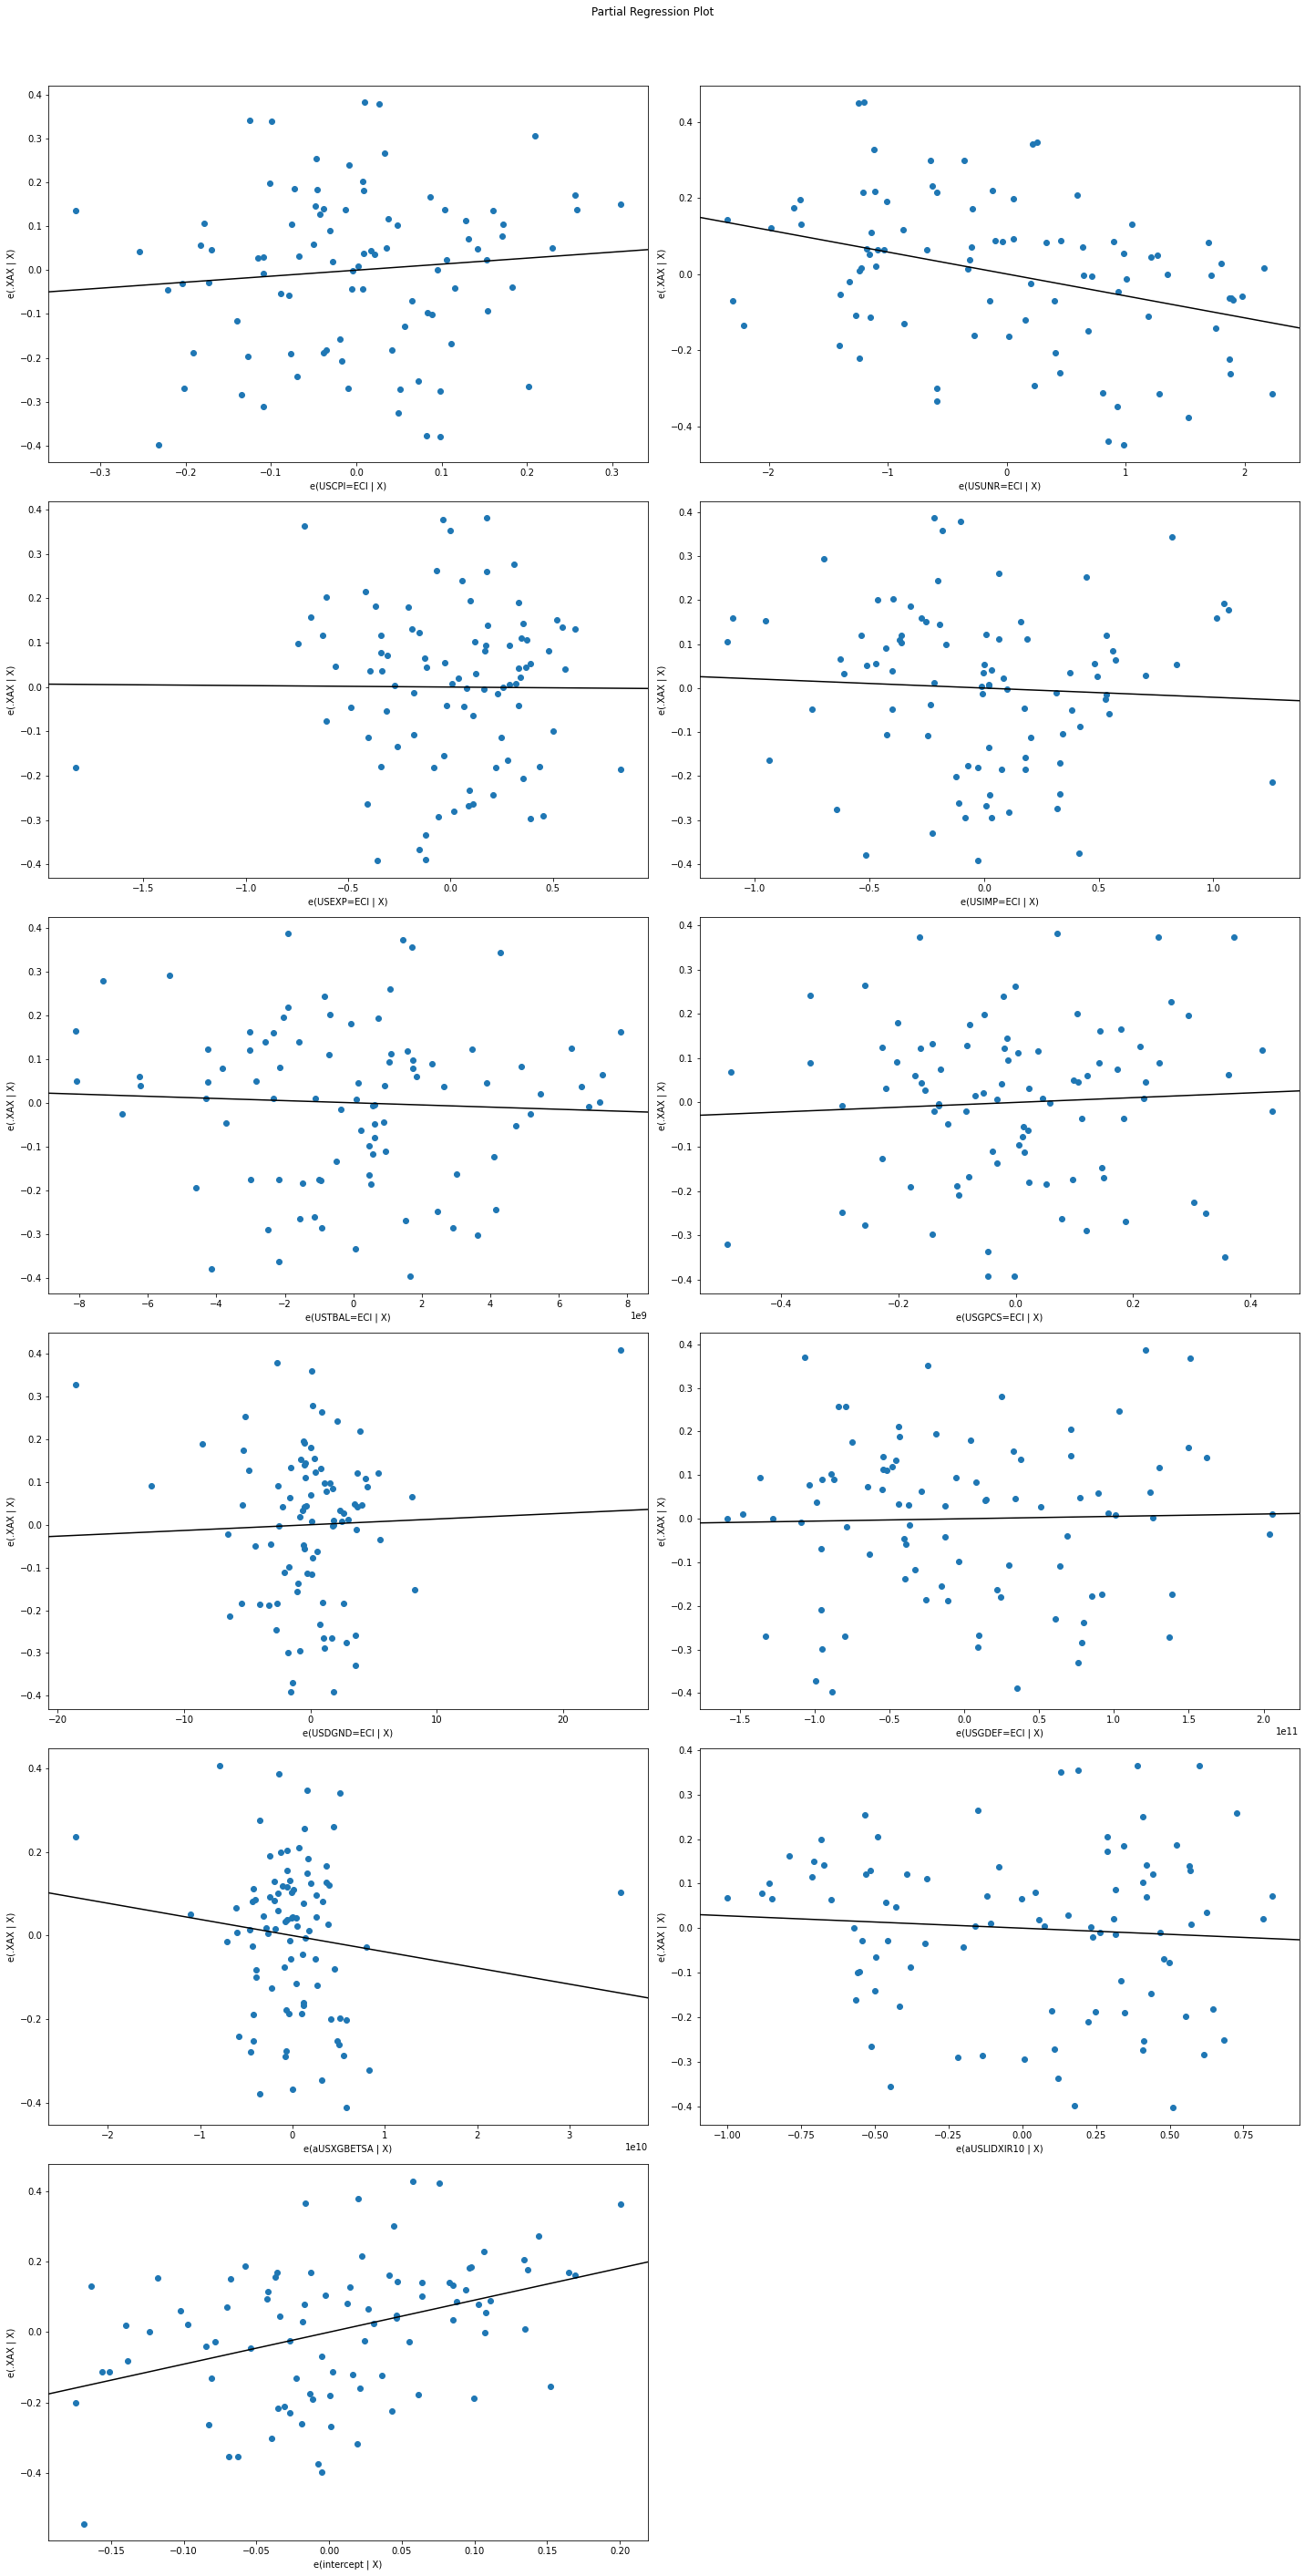

In [20]:
figure = plt.figure(figsize=(20, 40))
sm.graphics.plot_partregress_grid(result, fig = figure)
plt.savefig('plots.jpg')